# Infosys Practice Assignment

# Numpy
Lee decides to walk 10000 steps every day to combat the effect that lockdown has had on his body’s agility, mobility, flexibility and strength. Consider the following data from fitness tracker over a period of 10 days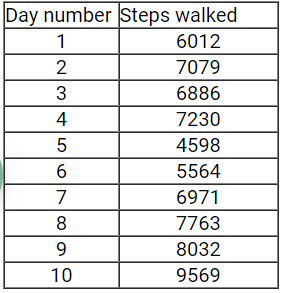

In [ ]:
import numpy as np

# Creating the array
steps_data = np.array([
    [1, 6012],
    [2, 7079],
    [3, 6886],
    [4, 7230],
    [5, 4598],
    [6, 5564],
    [7, 6971],
    [8, 7763],
    [9, 8032],
    [10, 9569]
])

steps_data

array([[   1, 6012],
       [   2, 7079],
       [   3, 6886],
       [   4, 7230],
       [   5, 4598],
       [   6, 5564],
       [   7, 6971],
       [   8, 7763],
       [   9, 8032],
       [  10, 9569]])

In [ ]:
# Adding 2000 steps to each observation
steps_data[:, 1] += 2000

steps_data

array([[    1,  8012],
       [    2,  9079],
       [    3,  8886],
       [    4,  9230],
       [    5,  6598],
       [    6,  7564],
       [    7,  8971],
       [    8,  9763],
       [    9, 10032],
       [   10, 11569]])

In [ ]:
# Filtering days with steps > 9000
steps_over_9000 = steps_data[steps_data[:, 1] > 9000]
print("Steps walked more than 9000:\n", steps_over_9000)

Steps walked more than 9000:
 [[    2  9079]
 [    4  9230]
 [    8  9763]
 [    9 10032]
 [   10 11569]]


In [ ]:
# Sorting the array by steps walked
sorted_steps = steps_data[steps_data[:, 1].argsort()]
print("Sorted array based on steps walked:\n", sorted_steps)

Sorted array based on steps walked:
 [[    5  6598]
 [    6  7564]
 [    1  8012]
 [    3  8886]
 [    7  8971]
 [    2  9079]
 [    4  9230]
 [    8  9763]
 [    9 10032]
 [   10 11569]]


# Pandas
1. Import the data into Python environment as a Pandas DataFrame.
2. Check for missing values, if any and drop the corresponding rows.
3. Find the district that gets the highest annual rainfall.
4. Display the top 5 states that get the highest annual rainfall.
5. Drop the columns 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec'.
6. Display the state-wise mean rainfall for all the months using a pivot table.
7. Display the count of districts in each state.
8. For each state, display the district that gets the highest rainfall in May. Also display the recorded rainfall.

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# Import Libraries
import pandas as pd

# Load the dataset from the provided CSV file path
file_path = '/content/drive/MyDrive/Python for Data Science/rainfall.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Drop rows with missing values
df_cleaned = df.dropna()

In [ ]:
# Assuming there's a column named 'Annual' that contains the annual rainfall data
max_rainfall_district = df_cleaned.loc[df_cleaned['ANNUAL'].idxmax()]
print("District with the highest annual rainfall:")
print(max_rainfall_district[['DISTRICT', 'ANNUAL']])

District with the highest annual rainfall:
DISTRICT    TAMENGLONG
ANNUAL          7229.3
Name: 55, dtype: object


In [ ]:
# Group by 'State' and sum the annual rainfall, then sort to find the top 5
top_5_states = df_cleaned.groupby('STATE_UT_NAME')['ANNUAL'].sum().sort_values(ascending=False).head(5)
print("Top 5 states with the highest annual rainfall:")
print(top_5_states)

Top 5 states with the highest annual rainfall:
STATE_UT_NAME
UTTAR PRADESH        67836.6
ASSAM                66267.7
MADHYA PRADESH       51615.5
ARUNACHAL PRADESH    46838.0
BIHAR                45621.1
Name: ANNUAL, dtype: float64


In [ ]:
# Dropping the specified columns
df_cleaned = df_cleaned.drop(columns=['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec'])

In [ ]:
# Create a pivot table to calculate the mean rainfall for each state across all months
statewise_mean_rainfall = df_cleaned.pivot_table(values=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'],
                                                 index='STATE_UT_NAME', aggfunc='mean')
print("State-wise mean rainfall for all months:")
print(statewise_mean_rainfall)

State-wise mean rainfall for all months:
                                    APR         AUG         DEC        FEB  \
STATE_UT_NAME                                                                
ANDAMAN And NICOBAR ISLANDS   86.966667  385.300000  159.733333  33.266667   
ANDHRA PRADESH                19.873913  179.426087   15.565217   7.352174   
ARUNACHAL PRADESH            275.162500  378.600000   35.956250  93.293750   
ASSAM                        181.266667  377.370370   11.440741  31.714815   
BIHAR                         16.865789  289.481579    5.786842   9.278947   
CHANDIGARH                    14.800000  287.500000   23.400000  38.900000   
CHATISGARH                    13.116667  375.338889    5.811111  10.472222   
DADAR NAGAR HAVELI             0.000000  655.900000    0.000000   0.300000   
DAMAN AND DUI                  0.100000  394.600000    0.450000   0.500000   
DELHI                          8.900000  245.500000    8.600000  16.300000   
GOA                    

In [ ]:
# Count the number of districts in each state
district_count = df_cleaned['STATE_UT_NAME'].value_counts()
print("Count of districts in each state:")
print(district_count)

Count of districts in each state:
STATE_UT_NAME
UTTAR PRADESH                  71
MADHYA PRADESH                 50
BIHAR                          38
MAHARASHTRA                    35
RAJASTHAN                      33
TAMIL NADU                     32
KARNATAKA                      30
ORISSA                         30
ASSAM                          27
GUJARAT                        26
JHARKHAND                      24
ANDHRA PRADESH                 23
JAMMU AND KASHMIR              22
HARYANA                        21
PUNJAB                         20
WEST BENGAL                    19
CHATISGARH                     18
ARUNACHAL PRADESH              16
KERALA                         14
UTTARANCHAL                    13
HIMACHAL                       12
NAGALAND                       11
MIZORAM                         9
MANIPUR                         9
DELHI                           9
MEGHALAYA                       7
SIKKIM                          4
TRIPURA                         4


In [ ]:
# Group by 'State' and find the district with the maximum rainfall in May
highest_may_rainfall = df_cleaned.loc[df_cleaned.groupby('STATE_UT_NAME')['MAY'].idxmax()][['STATE_UT_NAME', 'DISTRICT', 'MAY']]
print("District with the highest rainfall in May for each state:")
print(highest_may_rainfall)

District with the highest rainfall in May for each state:
                   STATE_UT_NAME       DISTRICT    MAY
1    ANDAMAN And NICOBAR ISLANDS  SOUTH ANDAMAN  374.4
544               ANDHRA PRADESH  VISAKHAPATNAM   96.6
10             ARUNACHAL PRADESH     PAPUM PARE  453.0
31                         ASSAM      KARIMGANJ  604.0
194                        BIHAR     KISHANGANJ  155.7
306                   CHANDIGARH     CHANDIGARH   30.1
519                   CHATISGARH         BASTAR   38.6
479           DADAR NAGAR HAVELI            DNH    7.4
480                DAMAN AND DUI          DAMAN    7.4
307                        DELHI      NEW DELHI   19.3
488                          GOA      NORTH GOA   94.3
458                      GUJARAT          DANGS   12.5
303                      HARYANA      PANCHKULA   27.9
341                     HIMACHAL  LAHUL & SPITI   91.7
349            JAMMU AND KASHMIR      BARAMULLA  111.4
154                    JHARKHAND          PAKUR   86.1
598    

# Matplotlib
Given the following values for x and y, use Matplotlib to plot the figure :

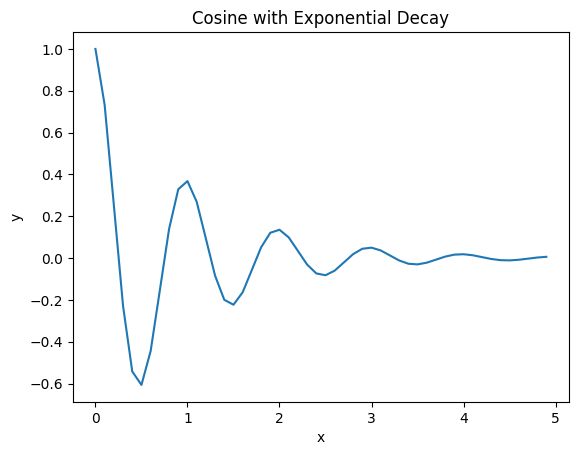

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 5.0, 0.1)
y = np.cos(2 * np.pi * x) * np.exp(-x)

plt.plot(x, y)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Cosine with Exponential Decay')

plt.show()